In [1]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
import pyccl as ccl
from scipy import signal

In [2]:
noise_map = np.random.normal(0, 1, (128, 128))

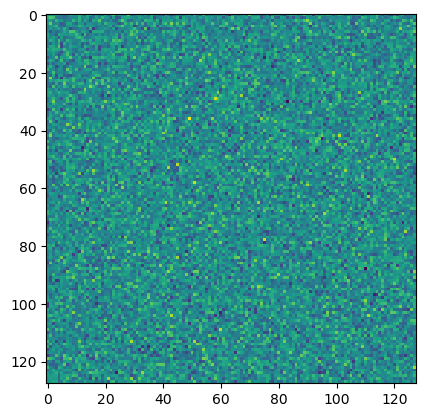

In [3]:
plt.imshow(noise_map, interpolation='none')

In [4]:
NSIDE = 512
print(
    "Approximate resolution at NSIDE {} is {:.2} deg".format(
        NSIDE, hp.nside2resol(NSIDE, arcmin=True) / 60
    )
)

Approximate resolution at NSIDE 512 is 0.11 deg


In [5]:
NPIX = hp.nside2npix(NSIDE)
print(NPIX)

3145728


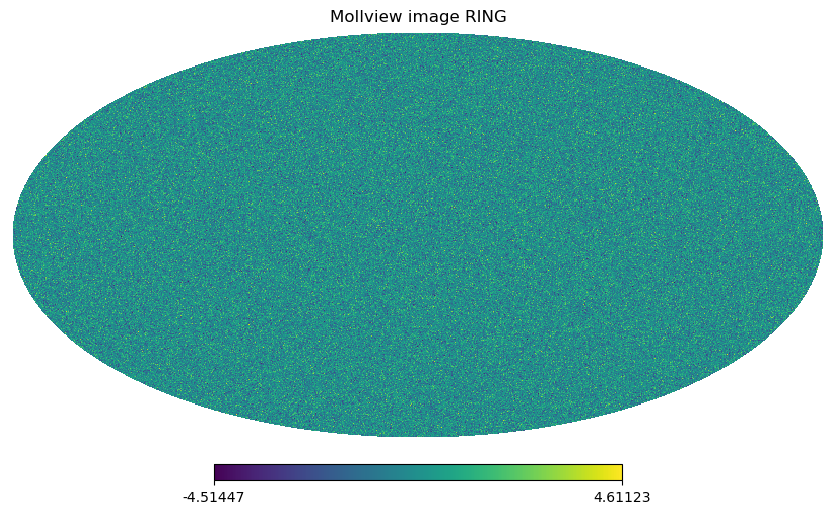

In [6]:
m = np.random.normal(0, 1, NPIX)
hp.mollview(m, title="Mollview image RING")
#hp.graticule()

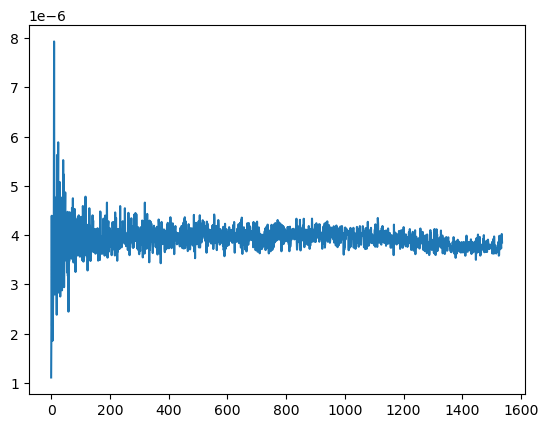

In [7]:
cl = hp.anafast(m)
plt.plot(cl)

In [8]:
cosmo = ccl.Cosmology(Omega_c=0.25, Omega_b=0.05,
                          h=0.7, n_s=0.95, sigma8=0.8,
                          transfer_function='bbks')

In [9]:
zs = np.linspace(0, 7, 200)
z_drop = 5
ells = np.arange(0, 500, 1)
gals = ccl.NumberCountsTracer(cosmo, has_rsd=False, dndz=(zs, np.exp(-((zs-z_drop)/0.1)**2)),
                                  bias=(zs, np.ones_like(zs)))

z_int = 0.5
ints = ccl.NumberCountsTracer(cosmo, has_rsd=False, dndz=(zs, np.exp(-((zs-z_int)/0.1)**2)),
                                  bias=(zs, np.ones_like(zs)))


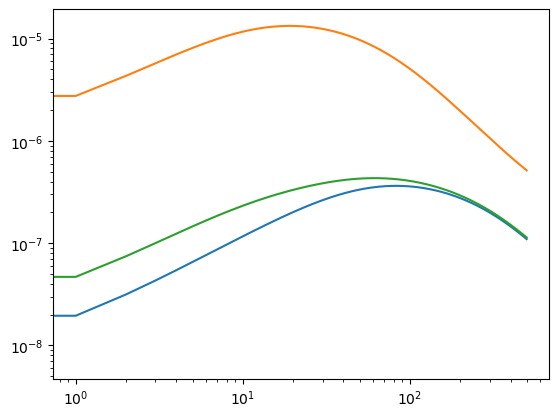

In [18]:
cl_drop = ccl.angular_cl(cosmo, gals, gals, ells)
cl_int = ccl.angular_cl(cosmo, ints, ints, ells)
f_int = 0.01
plt.plot(ells, cl_drop)
plt.plot(ells, cl_int)
plt.plot(ells, f_int*cl_int + (1-f_int)*cl_drop)
plt.yscale("log")
plt.xscale("log")

In [11]:
map_drop = hp.synfast(cl_drop, NSIDE)
map_int = hp.synfast(cl_int, NSIDE)

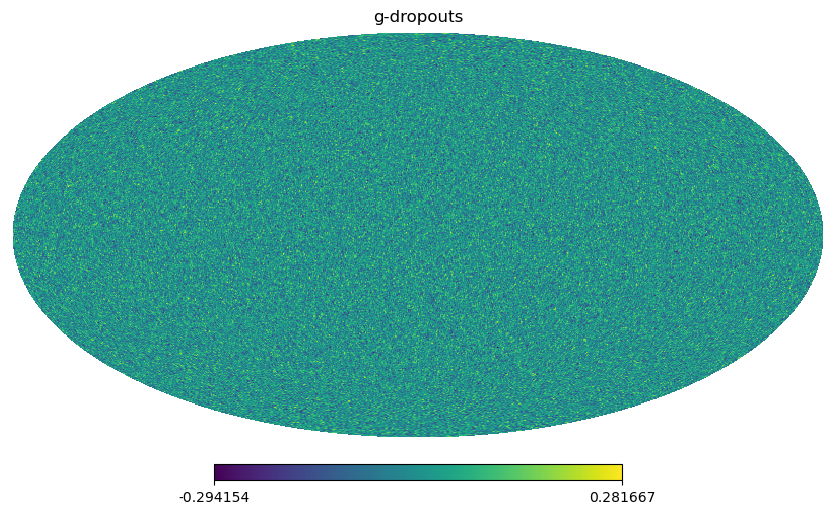

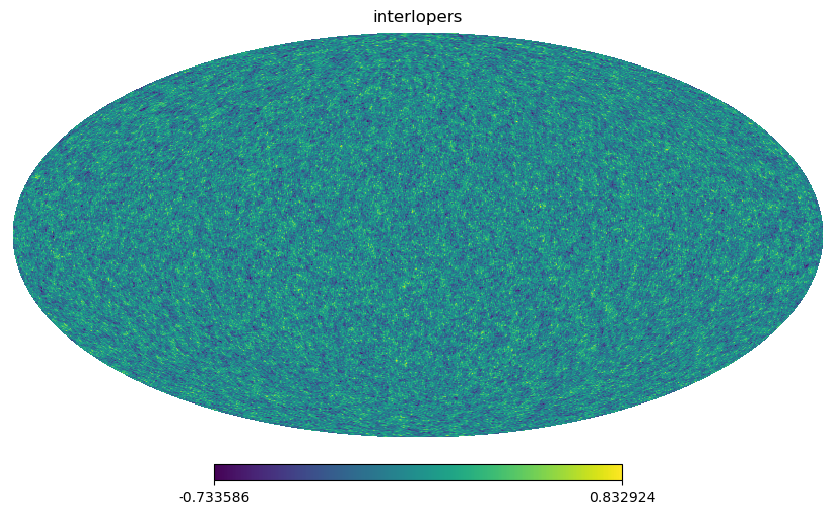

In [12]:
hp.mollview(map_drop, title="g-dropouts", alpha=np.ones_like(map_drop))
hp.mollview(map_int, title="interlopers", alpha=np.ones_like(map_int))

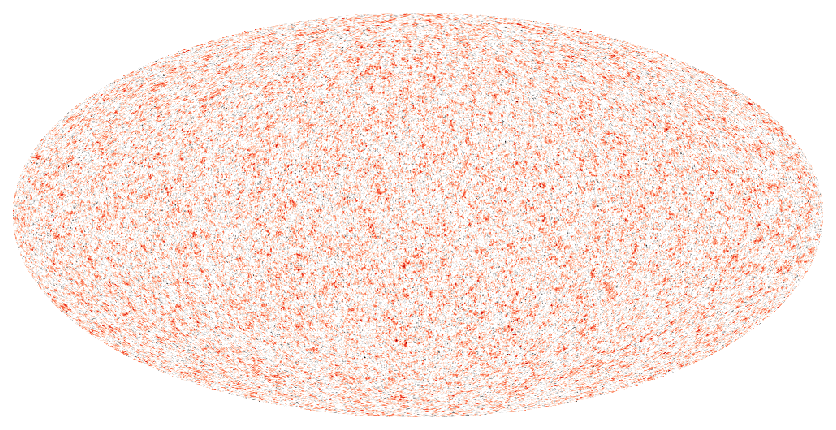

In [13]:
interloper_overdensities = np.where(map_int < 0, map_int*0, map_int)
dropout_overdensities = np.where(map_drop < 0, map_drop*0, map_drop)
hp.mollview(dropout_overdensities, fig=1, cmap="Greys", title=None, cbar=False, xsize=1000, alpha=np.where(dropout_overdensities == 0, 0, 1))
hp.mollview(interloper_overdensities, cmap="Reds", fig=1, title=None, cbar=False, xsize=1000, alpha=np.where(interloper_overdensities == 0, 0, 1))


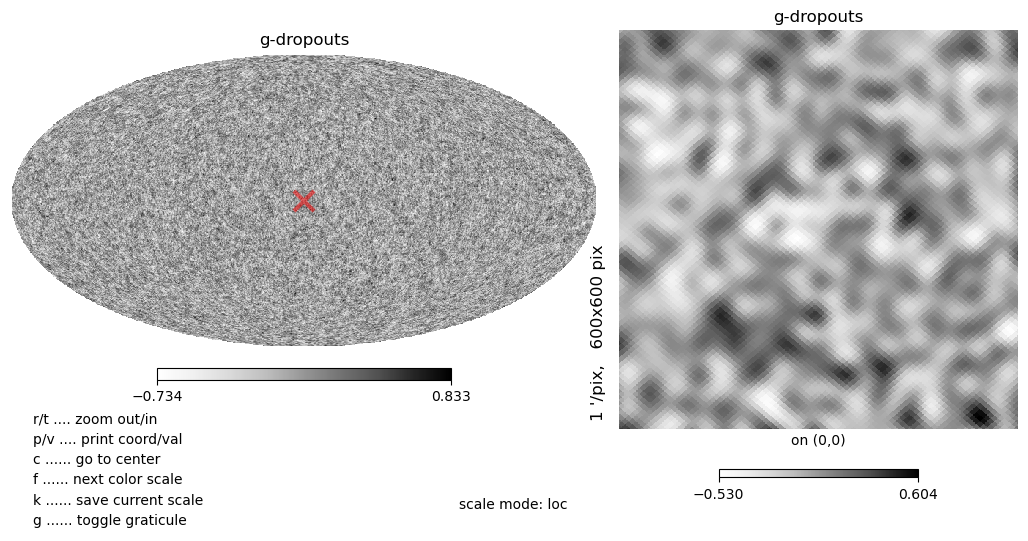

In [14]:
#%matplotlib widget
hp.zoomtool.mollzoom(map_int, cmap="Greys", title="g-dropouts")

In [15]:
#map_comb = map_drop + map_int
#cl_comb = hp.anafast(map_comb)
#plt.plot(cl_comb)
#plt.plot(cl_drop)
#plt.plot(cl_int)
#plt.yscale("log")